In [5]:
%matplotlib inline

import logging

import emcee
import h5py
import numpy as np
import matplotlib.pyplot as plt

from os import path
import sys
sys.path.insert(0, path.abspath('../'))

from src import workdir, parse_model_parameter_file
from src.emulator import Emulator
from src.mcmc import Chain

In [6]:
exp_path = "../test/pseudo_expdata.txt"
model_par = "../model_parameter_dict_examples/ABCD.txt"
training_set = "../test/model_results"
mymcmc = Chain(expdata_path=exp_path, model_parafile=model_par,
               training_data_path=training_set)

[INFO][mcmc] Initializing MCMC ...
[INFO][mcmc] Final Markov Chain results will be saved in mcmc/chain.h5
[INFO][mcmc] Loading the model parameters space from ../model_parameter_dict_examples/ABCD.txt ...
[INFO][mcmc] Loading the experiment data from ../test/pseudo_expdata.txt ...
[INFO][mcmc] Initializing emulators for the training model ...
[INFO][emulator] loading training data from ../test/model_results ...
[INFO][emulator] All training data are loaded.
[INFO][emulator] 10 PCs explain 0.99984 of variance
[INFO][emulator] Training emulators...


/usr/local/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:506: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/usr/local/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value 

[INFO][emulator] GP 0: 0.43077 of variance, LML = 1259.7, kernel: 68.6**2 * RBF(length_scale=[10, 0.525, 9.96, 0.938]) + WhiteKernel(noise_level=0.0001)
[INFO][emulator] GP 1: 0.37387 of variance, LML = 1173.4, kernel: 49.1**2 * RBF(length_scale=[5.16, 0.241, 10, 2.03]) + WhiteKernel(noise_level=0.0001)
[INFO][emulator] GP 2: 0.10025 of variance, LML = 1140.4, kernel: 30.8**2 * RBF(length_scale=[3.92, 0.188, 10, 4.56]) + WhiteKernel(noise_level=0.0001)
[INFO][emulator] GP 3: 0.06999 of variance, LML = 1081.7, kernel: 21.8**2 * RBF(length_scale=[10, 0.517, 5.55, 0.566]) + WhiteKernel(noise_level=0.000147)
[INFO][emulator] GP 4: 0.02158 of variance, LML = 851.43, kernel: 60.8**2 * RBF(length_scale=[4, 0.165, 10, 5.13]) + WhiteKernel(noise_level=0.000198)
[INFO][emulator] GP 5: 0.00196 of variance, LML = 261.25, kernel: 11.5**2 * RBF(length_scale=[2.15, 0.101, 9.88, 1.44]) + WhiteKernel(noise_level=0.00354)
[INFO][emulator] GP 6: 0.00124 of variance, LML = 177.46, kernel: 31.2**2 * RBF(le

/usr/local/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 1 of parameter k1__k2__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/usr/local/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 3 of parameter k1__k2__length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


[INFO][mcmc] Starting MCMC ...
[INFO][mcmc] no existing chain found, starting initial burn-in
[INFO][mcmc] running 100 walkers for 100 steps
[INFO][mcmc] step 10: acceptance fraction: mean 0.3400, std 0.1414, min 0.1000, max 0.7000
[INFO][mcmc] step 20: acceptance fraction: mean 0.3460, std 0.1055, min 0.1000, max 0.7000
[INFO][mcmc] step 30: acceptance fraction: mean 0.3567, std 0.0836, min 0.1333, max 0.6000
[INFO][mcmc] step 40: acceptance fraction: mean 0.3725, std 0.0704, min 0.2000, max 0.5250
[INFO][mcmc] step 50: acceptance fraction: mean 0.3950, std 0.0628, min 0.2400, max 0.5600
[INFO][mcmc] step 60: acceptance fraction: mean 0.4233, std 0.0572, min 0.2500, max 0.5500
[INFO][mcmc] step 70: acceptance fraction: mean 0.4489, std 0.0506, min 0.2857, max 0.5571
[INFO][mcmc] step 80: acceptance fraction: mean 0.4642, std 0.0514, min 0.3000, max 0.5750
[INFO][mcmc] step 90: acceptance fraction: mean 0.4761, std 0.0471, min 0.3222, max 0.5889
[INFO][mcmc] step 100: acceptance fracti

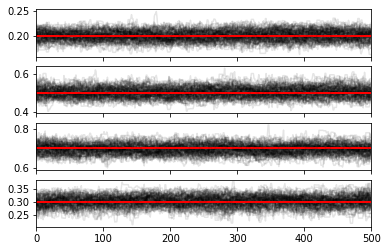

[(0.20138130338936028, 0.01057349653841777, 0.01026749434096394), (0.5040819299990124, 0.02758347301456987, 0.026813276994653412), (0.6962023107915996, 0.024454917094337003, 0.026039887349301183), (0.30381430543680255, 0.019554383122445396, 0.02122696365195742)]


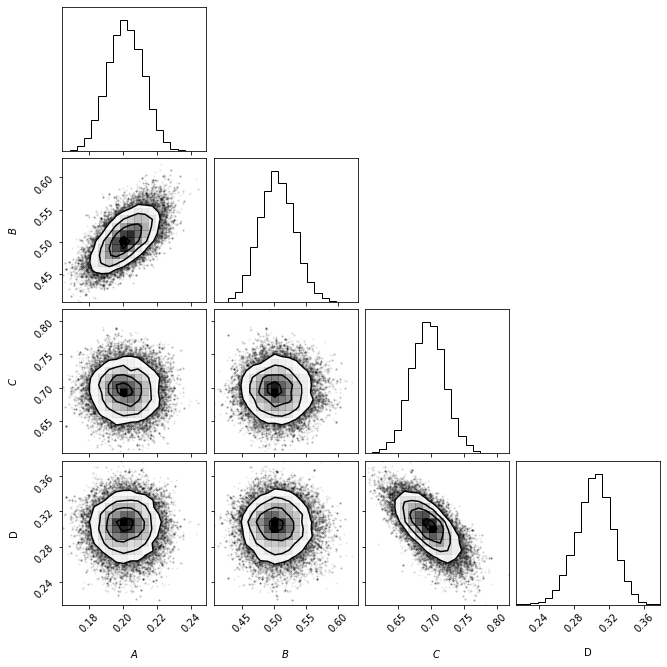

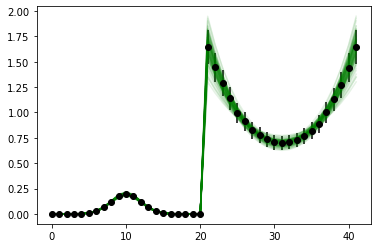

In [7]:
nsteps = 500
nwalkers = 100
nburnsteps = 200
status = None
mymcmc.run_mcmc(nsteps=nsteps, nburnsteps=nburnsteps,
                nwalkers=nwalkers, status=status)